<b><font color = "blue">Fake News Classifier </font></b><br>
<b>Dataset : <font color = "blue"> https://www.kaggle.com/c/fake-news/data# </font></b><br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [5]:
## Get Independent Features 

x = df.drop('label',axis=1)

In [6]:
x.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [7]:
y = df['label']

In [9]:
y.head(2)

0    1
1    0
Name: label, dtype: int64

In [11]:
df.shape

(20800, 5)

In [13]:
df = df.dropna()

In [14]:
df.shape

(18285, 5)

In [19]:
message = df.copy()

In [20]:
message.reset_index(inplace=True)

In [22]:
## EDA 

import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus =[]

for i in range(0 , len(message)):
    review = re.sub('[^a-zA-Z]',' ',message['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
## creating Bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x  = cv.fit_transform(corpus).toarray()

In [31]:
y = message['label']

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.33,random_state=0)

In [41]:
cv.get_feature_names()[:5]

['abandon', 'abc', 'abc news', 'abduct', 'abe']

In [42]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [44]:
count_df = pd.DataFrame(train_x,columns=cv.get_feature_names())

In [45]:
count_df.head(2)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
import matplotlib.pyplot as plt

In [47]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="confusion matrix",
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print("Confusion matrix, without normalization")
        
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
    

<b><font color = "blue">Fake News Classifier with Multinomial Navie Bayes </font></b><br>

In [48]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [49]:
from sklearn import metrics
import numpy as np
import itertools

accuracy : 0.901
Confusion matrix, without normalization


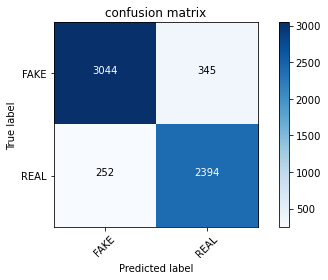

In [50]:
classifier.fit(train_x,train_y)
pred = classifier.predict(test_x)
score = metrics.accuracy_score(test_y,pred)
print("accuracy : %0.3f" %score)
cm = metrics.confusion_matrix(test_y,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

<b><font color = "blue">Fake News Classifier with Passive Aggressive Classifier </font></b><br>

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy : 0.919
Confusion matrix, without normalization


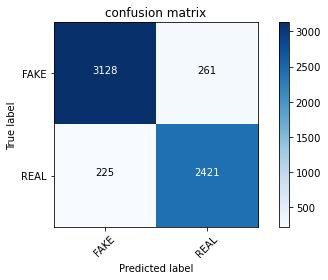

In [54]:
linear_clf.fit(train_x,train_y)
pred_1 = linear_clf.predict(test_x)
score = metrics.accuracy_score(test_y,pred_1)
print("accuracy : %0.3f" %score)
cm = metrics.confusion_matrix(test_y,pred_1)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

<b><font color = "blue">Fake News Classifier -  Multinomial Classifier with Hyperparameter </font></b><br>

In [58]:
classifier_alpha = MultinomialNB(alpha=0.11)

In [61]:
previous_score = 0
for alpha in np.arange(0,2,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(train_x,train_y)
    pred = sub_classifier.predict(test_x)
    score = metrics.accuracy_score(test_y,pred)
    
    if score > previous_score:
        classifier_alpha = sub_classifier
    print("Alpha : {} , score : {}".format(alpha,score))

C:\Users\Senjuti-PC\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha : 0.0 , score : 0.8906379453189727
Alpha : 0.1 , score : 0.9012427506213753
Alpha : 0.2 , score : 0.9015741507870754
Alpha : 0.30000000000000004 , score : 0.9015741507870754
Alpha : 0.4 , score : 0.9007456503728252
Alpha : 0.5 , score : 0.9005799502899752
Alpha : 0.6000000000000001 , score : 0.9015741507870754
Alpha : 0.7000000000000001 , score : 0.9019055509527755
Alpha : 0.8 , score : 0.9007456503728252
Alpha : 0.9 , score : 0.9009113504556753
Alpha : 1.0 , score : 0.9010770505385253
Alpha : 1.1 , score : 0.9010770505385253
Alpha : 1.2000000000000002 , score : 0.9012427506213753
Alpha : 1.3 , score : 0.9020712510356255
Alpha : 1.4000000000000001 , score : 0.9012427506213753
Alpha : 1.5 , score : 0.9015741507870754
Alpha : 1.6 , score : 0.9014084507042254
Alpha : 1.7000000000000002 , score : 0.9010770505385253
Alpha : 1.8 , score : 0.9015741507870754
Alpha : 1.9000000000000001 , score : 0.9014084507042254


In [64]:
feature_name = cv.get_feature_names()

In [63]:
classifier.coef_[0]

array([ -9.09148927,  -8.62148564,  -9.09148927, ..., -10.70092718,
        -8.90916771,  -9.31463282])

<b><font color = "blue">Below are the fake words  </font></b><br>

In [71]:
sorted(zip(classifier_alpha.coef_[0],feature_name) ,reverse=False)[:30]

[(-10.155617437715348, 'abe'),
 (-10.155617437715348, 'abroad'),
 (-10.155617437715348, 'abus new'),
 (-10.155617437715348, 'abus new york'),
 (-10.155617437715348, 'act new'),
 (-10.155617437715348, 'act new york'),
 (-10.155617437715348, 'advic'),
 (-10.155617437715348, 'advis new'),
 (-10.155617437715348, 'advis new york'),
 (-10.155617437715348, 'afford care'),
 (-10.155617437715348, 'afford care act'),
 (-10.155617437715348, 'age new'),
 (-10.155617437715348, 'age new york'),
 (-10.155617437715348, 'agenda breitbart'),
 (-10.155617437715348, 'ail'),
 (-10.155617437715348, 'airbag'),
 (-10.155617437715348, 'aleppo new'),
 (-10.155617437715348, 'aleppo new york'),
 (-10.155617437715348, 'ali'),
 (-10.155617437715348, 'america breitbart'),
 (-10.155617437715348, 'america new york'),
 (-10.155617437715348, 'ami'),
 (-10.155617437715348, 'ami schumer'),
 (-10.155617437715348, 'amp'),
 (-10.155617437715348, 'ann'),
 (-10.155617437715348, 'ann coulter'),
 (-10.155617437715348, 'announc n